# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
pprint(cities)

['mys shmidta',
 'hirado',
 'bredasdorp',
 'hobart',
 'north bend',
 'cape town',
 'ushuaia',
 'jamestown',
 'viedma',
 'victoria',
 'kapaa',
 'iqaluit',
 'chokurdakh',
 'atuona',
 'asfi',
 'busselton',
 'marsh harbour',
 'bara',
 'cidreira',
 'east london',
 'shaartuz',
 'belushya guba',
 'mahebourg',
 'sitka',
 'hermanus',
 'yar-sale',
 'salinopolis',
 'brae',
 'puerto ayora',
 'dryden',
 'albany',
 'taolanaro',
 'katsuura',
 'illoqqortoormiut',
 'lompoc',
 'marcona',
 'tiksi',
 'anadyr',
 'norman wells',
 'cabo san lucas',
 'cherskiy',
 'aksum',
 'klaksvik',
 'port alfred',
 'altamirano',
 'upernavik',
 'rikitea',
 'elizabeth city',
 'punta arenas',
 'naze',
 'georgetown',
 'barrow',
 'vostok',
 'lugovskiy',
 'khatanga',
 'ponta do sol',
 'bluff',
 'port elizabeth',
 'nabire',
 'maykain',
 'ulladulla',
 'bunda',
 'sao filipe',
 'hithadhoo',
 'saint-philippe',
 'fairbanks',
 'butaritari',
 'abilene',
 'tasiilaq',
 'raudeberg',
 'vaini',
 'lagoa',
 'airai',
 'baykit',
 'zuya',
 'kazal

In [27]:
# Create empty lists to store weather data
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
get_date = []
city_id = []
city_name = []

In [28]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Get weather data
for city in cities:
    response = requests.get(query_url + city)
    
weather_json = response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 8, 'lon': 124.29},
 'dt': 1604424249,
 'id': 1701054,
 'main': {'feels_like': 79.52,
          'humidity': 86,
          'pressure': 1011,
          'temp': 75,
          'temp_max': 75,
          'temp_min': 75},
 'name': 'Marawi',
 'sys': {'country': 'PH',
         'id': 2007154,
         'sunrise': 1604439107,
         'sunset': 1604481659,
         'type': 3},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'gust': 10, 'speed': 5.99}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Create empty lists to store weather data
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
get_date = []
city_id = []
city_name = []


print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 0
set_count = 1

for index, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append (response['coord']['lat'])
        lng.append (response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        get_date.append(response['dt'])
        curr_city_id=response['id']
        city_id.append(curr_city_id)
        
        if record_count > 49:
            record_count = 0
            set_count = set_count + 1

        else:
            record_count = record_count + 1

        print(f"Processing Record {record_count} of Set {set_count} | {city} {curr_city_id}")

    
    except (KeyError):
        print(f"City not found. Skipping.....")
#     break

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping.....
Processing Record 1 of Set 1 | hirado 1862555
Processing Record 2 of Set 1 | bredasdorp 1015776
Processing Record 3 of Set 1 | hobart 2163355
Processing Record 4 of Set 1 | north bend 5742974
Processing Record 5 of Set 1 | cape town 3369157
Processing Record 6 of Set 1 | ushuaia 3833367
Processing Record 7 of Set 1 | jamestown 5122534
Processing Record 8 of Set 1 | viedma 3832899
Processing Record 9 of Set 1 | victoria 1819729
Processing Record 10 of Set 1 | kapaa 5848280
Processing Record 11 of Set 1 | iqaluit 5983720
Processing Record 12 of Set 1 | chokurdakh 2126123
Processing Record 13 of Set 1 | atuona 4020109
Processing Record 14 of Set 1 | asfi 2537881
Processing Record 15 of Set 1 | busselton 2075265
Processing Record 16 of Set 1 | marsh harbour 3571913
Processing Record 17 of Set 1 | bara 2347758
Processing Record 18 of Set 1 | cidreira 3466165
Processing Record 19 of Set 1 | east london 10069

Processing Record 0 of Set 4 | salalah 286621
Processing Record 1 of Set 4 | altay 1529651
Processing Record 2 of Set 4 | moussoro 2427336
Processing Record 3 of Set 4 | oistins 3373652
City not found. Skipping.....
City not found. Skipping.....
Processing Record 4 of Set 4 | lae 2092740
Processing Record 5 of Set 4 | aranos 3358666
Processing Record 6 of Set 4 | zapolyarnyy 464790
Processing Record 7 of Set 4 | san quintin 3984997
Processing Record 8 of Set 4 | sonoita 3982837
Processing Record 9 of Set 4 | narsaq 3421719
Processing Record 10 of Set 4 | thompson 6165406
Processing Record 11 of Set 4 | lebu 3883457
Processing Record 12 of Set 4 | buala 2109528
Processing Record 13 of Set 4 | alim 1731461
Processing Record 14 of Set 4 | kushiro 2129376
Processing Record 15 of Set 4 | souillac 933995
Processing Record 16 of Set 4 | chuy 3443061
Processing Record 17 of Set 4 | nanortalik 3421765
Processing Record 18 of Set 4 | xining 1788852
Processing Record 19 of Set 4 | broken hill 217

Processing Record 6 of Set 7 | bjelovar 3203982
Processing Record 7 of Set 7 | tautira 4033557
Processing Record 8 of Set 7 | kavaratti 1267390
Processing Record 9 of Set 7 | tias 2510485
Processing Record 10 of Set 7 | great yarmouth 2647984
Processing Record 11 of Set 7 | vila franca do campo 3372472
Processing Record 12 of Set 7 | nome 5870133
Processing Record 13 of Set 7 | la serena 3884373
Processing Record 14 of Set 7 | praia da vitoria 3372760
Processing Record 15 of Set 7 | khandyga 2022773
Processing Record 16 of Set 7 | elko 5703673
Processing Record 17 of Set 7 | sao joao da barra 3448903
Processing Record 18 of Set 7 | ribeira grande 3372707
Processing Record 19 of Set 7 | lunenburg 6062069
Processing Record 20 of Set 7 | varnavino 476982
Processing Record 21 of Set 7 | bud 4255151
Processing Record 22 of Set 7 | richards bay 962367
Processing Record 23 of Set 7 | esterhazy 5949563
Processing Record 24 of Set 7 | ostersund 2685750
Processing Record 25 of Set 7 | pogar 5078

Processing Record 14 of Set 10 | gat 293842
Processing Record 15 of Set 10 | sisimiut 3419842
Processing Record 16 of Set 10 | sobolevo 525426
Processing Record 17 of Set 10 | ust-kulom 478050
Processing Record 18 of Set 10 | mindelheim 2871045
Processing Record 19 of Set 10 | shimoda 1852357
Processing Record 20 of Set 10 | panjab 1131162
Processing Record 21 of Set 10 | bereda 3105522
Processing Record 22 of Set 10 | sakakah 102527
Processing Record 23 of Set 10 | lerwick 2644605
Processing Record 24 of Set 10 | den helder 2757220
Processing Record 25 of Set 10 | mount gambier 2156643
Processing Record 26 of Set 10 | labuhan 8079926
Processing Record 27 of Set 10 | la macarena 3827693
Processing Record 28 of Set 10 | kuantan 1735227
Processing Record 29 of Set 10 | paamiut 3421193
Processing Record 30 of Set 10 | beberibe 3405924
Processing Record 31 of Set 10 | ketchikan 5554428
Processing Record 32 of Set 10 | port-cartier 6111696
Processing Record 33 of Set 10 | xuddur 49747
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
weather_data = pd.DataFrame({"City": city_name, 
                             "Lat": lat, 
                             "Lng": lng, 
                             "Max Temp": max_temp, 
                             "Humidity": humidity, 
                             "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": country,
                            "Date": get_date
                            })
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hirado,33.36,129.55,50.00,25,18,3.00,JP,1604424253
1,Bredasdorp,-34.53,20.04,68.00,82,32,5.82,ZA,1604424253
2,Hobart,-42.88,147.33,71.01,45,90,10.29,AU,1604424193
3,North Bend,43.41,-124.22,51.01,93,90,8.05,US,1604424109
4,Cape Town,-33.93,18.42,70.00,82,20,14.99,ZA,1604424131
...,...,...,...,...,...,...,...,...,...
578,Pareora,-44.49,171.21,50.00,97,0,2.19,NZ,1604424981
579,Kruisfontein,-34.00,24.73,70.00,76,0,3.00,ZA,1604424983
580,Dongning,44.06,131.12,24.64,73,7,11.86,CN,1604424985
581,Khandagayty,50.73,92.05,26.74,93,100,0.45,RU,1604424993


In [31]:
weather_data.to_csv("output_data/cities.csv", index=False)

In [32]:
weather_data.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [33]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,20.788937,18.817787,58.142504,69.979417,52.687822,8.745094,1.604425e+09
std,33.314635,90.413406,24.199916,20.838924,37.405992,6.728059,2.652598e+02
min,-54.800000,-179.170000,-22.000000,10.000000,0.000000,0.310000,1.604424e+09
25%,-6.125000,-62.430000,45.000000,59.000000,13.500000,4.000000,1.604424e+09
50%,26.120000,19.230000,63.270000,76.000000,59.000000,7.070000,1.604425e+09
75%,48.030000,100.510000,77.000000,86.000000,90.000000,11.440000,1.604425e+09
max,78.220000,179.320000,95.720000,100.000000,100.000000,55.250000,1.604425e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

clean_city_data = weather_data.drop(weather_data[weather_data['Humidity'] > 100].index, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hirado,33.36,129.55,50.00,25,18,3.00,JP,1604424253
1,Bredasdorp,-34.53,20.04,68.00,82,32,5.82,ZA,1604424253
2,Hobart,-42.88,147.33,71.01,45,90,10.29,AU,1604424193
3,North Bend,43.41,-124.22,51.01,93,90,8.05,US,1604424109
4,Cape Town,-33.93,18.42,70.00,82,20,14.99,ZA,1604424131
...,...,...,...,...,...,...,...,...,...
578,Pareora,-44.49,171.21,50.00,97,0,2.19,NZ,1604424981
579,Kruisfontein,-34.00,24.73,70.00,76,0,3.00,ZA,1604424983
580,Dongning,44.06,131.12,24.64,73,7,11.86,CN,1604424985
581,Khandagayty,50.73,92.05,26.74,93,100,0.45,RU,1604424993


In [70]:
#Save clean dataframe 
clean_city_data.to_csv("output_data/cities.csv", index=False)

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [36]:

clean_city_data['Max Temp']

0      50.00
1      68.00
2      71.01
3      51.01
4      70.00
       ...  
578    50.00
579    70.00
580    24.64
581    26.74
582    75.00
Name: Max Temp, Length: 583, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

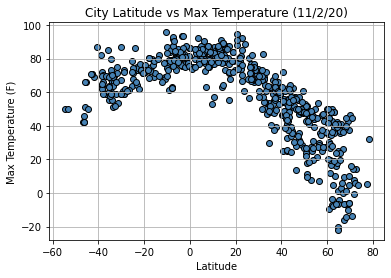

In [37]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker='o', color= 'steelblue', edgecolor="black")
plt.grid()
plt.title("City Latitude vs Max Temperature (11/2/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("../Graphs/Temp vs Latitude.png")
plt.show()

## Latitude vs. Humidity Plot

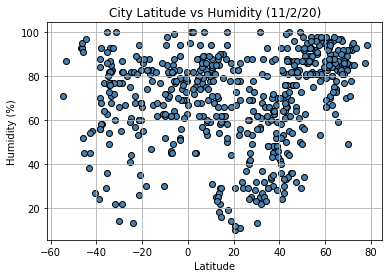

In [38]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker='o', color= 'steelblue', edgecolor="black")
plt.grid()
plt.title("City Latitude vs Humidity (11/2/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("../Graphs/Humidity vs Latitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

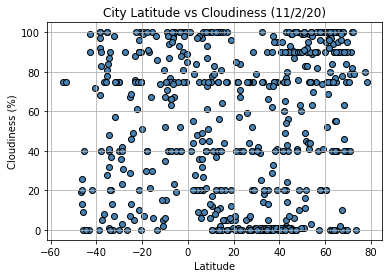

In [39]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker='o', color= 'steelblue', edgecolor="black")
plt.grid()
plt.title("City Latitude vs Cloudiness (11/2/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("../Graphs/Cloudiness vs Latitude.png")
plt.show()

## Latitude vs. Wind Speed Plot

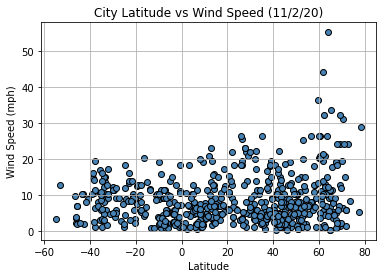

In [40]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker='o', color= 'steelblue', edgecolor="black")
plt.grid()
plt.title("City Latitude vs Wind Speed (11/2/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("../Graphs/Wind Speed vs Latitude.png")
plt.show()

## Linear Regression

In [41]:
south_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]
north_hemisphere = clean_city_data[clean_city_data["Lat"] > 0]
south_hemisphere.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bredasdorp,-34.53,20.04,68.00,82,32,5.82,ZA,1604424253
2,Hobart,-42.88,147.33,71.01,45,90,10.29,AU,1604424193
4,Cape Town,-33.93,18.42,70.00,82,20,14.99,ZA,1604424131
5,Ushuaia,-54.80,-68.30,50.00,71,75,3.36,AR,1604424010
7,Viedma,-40.81,-63.00,87.01,27,72,8.99,AR,1604424256


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.735867649870391


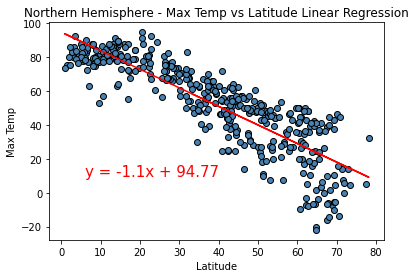

In [69]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("../Graphs/Linregress Northern Hem - Temp vs Lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.46627009170102474


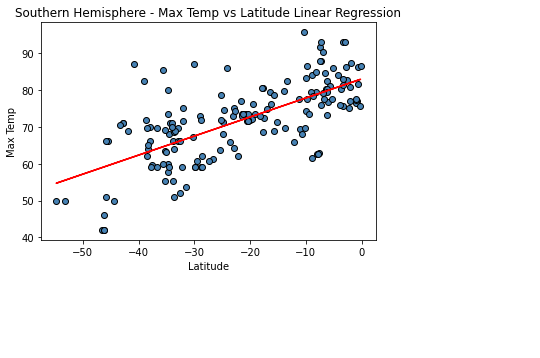

In [68]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("../Graphs/Linregress Southern Hem - Temp vs Lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.1031640900621813


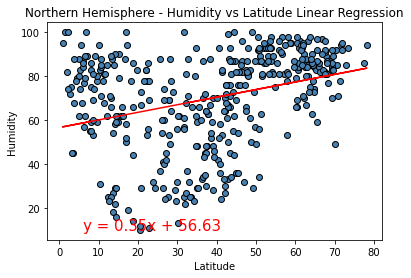

In [66]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("../Graphs/Linregress Northern Hem - Humidity vs Lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.0027337233236743906


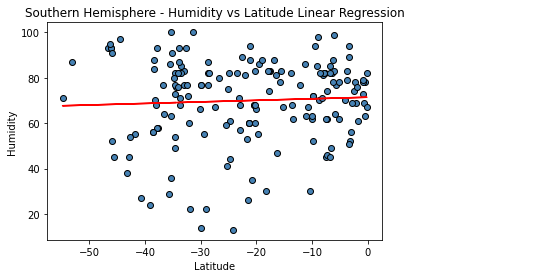

In [65]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("../Graphs/Linregress Southern Hem - Humidity vs Lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.07601135763590865


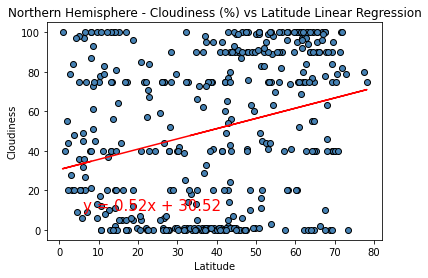

In [54]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("../Graphs/Linregress Northern Hem - Cloudiness vs Lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.11636940852039888


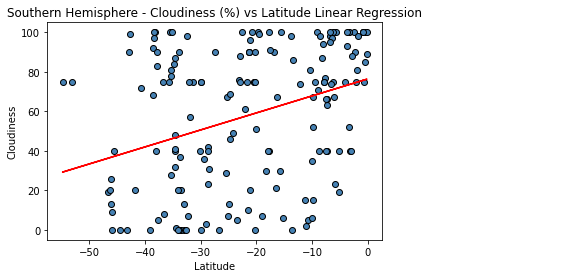

In [59]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("../Graphs/Linregress Southern Hem - Cloudiness vs Lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.04181653373358277


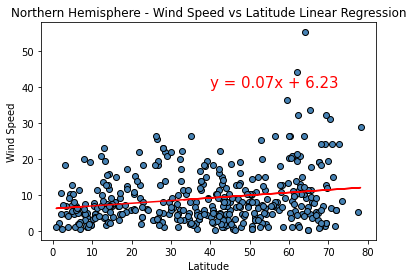

In [60]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("../Graphs/Linregress Northern Hem - Wind Speed vs Lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.02162483943574704


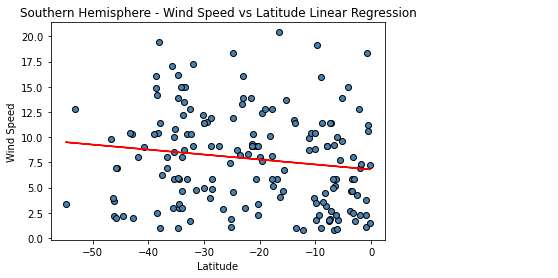

In [64]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,6),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("../Graphs/Linregress Southern Hem - Wind Speed vs Lat.png")
plt.show()